# Tasca M6 T01

### Ex1
##### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
##### Usarem: Linear Regression & Polynomial Regression!

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model

columnes= ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r"housing data.csv", names=columnes)
# data = openFileTable(path_name, "housing data.csv", separator, columnes)
print (df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [32]:
df.shape

(506, 14)

In [33]:
df.isnull().sum()
# Wonderful, no Nulls!

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.


<AxesSubplot:>

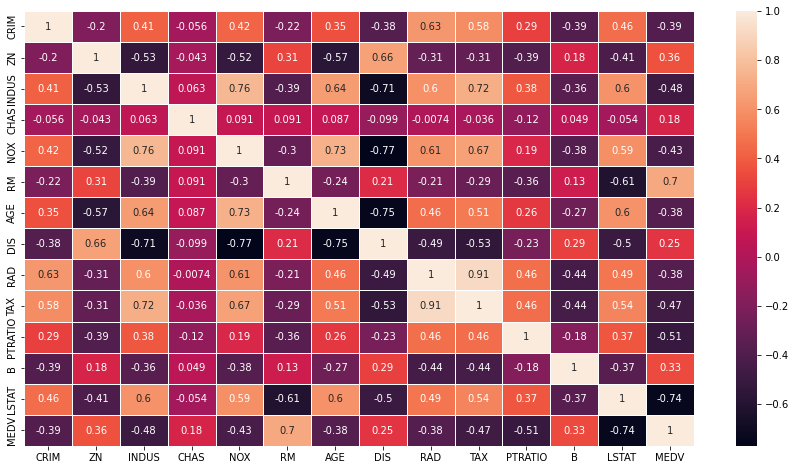

In [35]:
# check correlation
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True , lw=1 )

##### Seems MEDV has a very strong correlation to RM (Average number of rooms per dwelling) and a pretty significant negative correlations between LSTAT, PTRATIO, INDUS, and TAX

#### Set Train/Test

In [36]:
from sklearn.model_selection import train_test_split

#dataset & Prepare Target
# X, y = datasets.load_iris(return_X_y=True)
y = np.array(df['MEDV'])
X= df.drop('MEDV', axis = 1)
X_list = list(X.columns)


# 40% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


#### Model 1 = Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

#instance of our model
model = LinearRegression().fit(X_train, y_train)
# coefficient of determinatios = .score
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7668160223286261


In [39]:
print(f"intercept b0: {model.intercept_}")
print(f"slope b1: {model.coef_}")

intercept b0: 45.48141959325112
slope b1: [-1.03747356e-01  5.58589924e-02  5.88240770e-02  2.50523544e+00
 -1.90284888e+01  3.25353601e+00 -3.22150522e-03 -1.57603462e+00
  2.58716068e-01 -1.14681299e-02 -1.10777478e+00  5.50051783e-03
 -5.59569992e-01]


In [40]:
#predict new data -> b0+b1*x
y_pred_model1 = model.predict(X_test)
print(f"predicted response:\n{y_pred_model1}")

predicted response:
[24.58155243 24.51629253 29.71379915 12.51132696 21.34965428 19.05443022
 20.94614567 20.95753329 19.54644456 20.53025981  6.96153725 17.1707288
 16.85608802  5.74921859 40.74378524 32.62964196 22.88997064 37.11387241
 30.94054261 23.12796161 24.54411122 25.50446659 20.37697803 30.82455449
 22.42949559 12.45993818 17.10212725 18.52819406 34.91024736 20.63587192
 18.38567423 17.65503994 19.39633993 23.8814007  29.06559846 19.49721361
 10.81151906 25.66712254 18.47597465 15.40207099 26.55714333 20.56301083
 21.8661955  16.10102382 22.05244625 24.87100697 19.97650209 22.98518884
  9.46781454 23.96350651 21.66355147 16.95911711 24.48952338 28.692406
 13.80788563 21.35149553 20.72525415 14.54282452 16.61385208 22.02338757
 17.15670419 21.27690041 33.12409276 31.40070549 18.22591067 33.35335507
 18.26583607 18.69440702 19.46223051 23.01614743 23.08383927 24.24060449
 31.46365924 28.75560967 26.32535083  4.94498016 36.16174377 23.6119604
 27.09367373 19.04866966 28.6045687

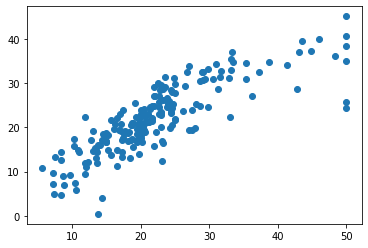

In [41]:
#Visualizing the test set results: 
plt.scatter(y_test,y_pred_model1)

<AxesSubplot:ylabel='Count'>

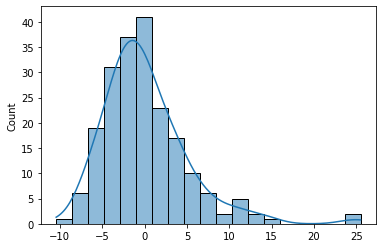

In [42]:
sns.histplot(y_test-y_pred_model1, kde=True)

#### Model 2 = Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
#transform to include some X2...
transformer = PolynomialFeatures(degree=2, include_bias=False)


In [44]:
# modified array
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.fit_transform(X_test)
print (X_train_trans)

[[3.76800000e-02 8.00000000e+01 1.52000000e+00 ... 1.53820840e+05
  2.59636400e+03 4.38244000e+01]
 [2.37934000e+00 0.00000000e+00 1.95800000e+01 ... 2.98978681e+04
  4.80689800e+03 7.72840000e+02]
 [1.34284000e+00 0.00000000e+00 1.95800000e+01 ... 1.25238132e+05
  2.27551270e+03 4.13449000e+01]
 ...
 [1.50980000e-01 0.00000000e+00 1.00100000e+01 ... 1.55638140e+05
  4.06345300e+03 1.06090000e+02]
 [2.29270000e-01 0.00000000e+00 6.91000000e+00 ... 1.54244708e+05
  7.38351200e+03 3.53440000e+02]
 [1.39140000e-01 0.00000000e+00 4.05000000e+00 ... 1.57529610e+05
  5.83046100e+03 2.15796100e+02]]


In [45]:
model2 = LinearRegression().fit(X_train_trans,  y_train)
r_sq = model2.score(X_train_trans,  y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model2.intercept_}")
print(f"coefficients: {model2.coef_}")

coefficient of determination: 0.9597608327938121
intercept: 0.29697542897940465
coefficients: [ 3.84568256e+00  4.58976975e-01 -6.83390427e+00  4.81707786e+01
 -1.14396214e+02  1.49087859e+00  1.86209955e+00 -8.08627072e+00
  5.39036137e-01  2.31935837e-01  2.72060626e+00 -1.83939615e-01
 -2.71082317e+00  2.27396567e-03  4.56337324e-01  6.45070380e-01
  7.45434678e-01  1.72291855e-01  4.15382926e-02 -5.58341307e-03
  1.03919340e-01  9.47490810e-01 -6.97774028e-02  3.72974844e-01
  4.12679437e-04  1.11016633e-02 -1.67400884e-03 -1.03730638e-02
  7.71789041e-03 -1.84100057e+00  2.57512400e-02  1.22867594e-03
  7.26640280e-03 -1.65545877e-03  5.96446312e-04 -1.17222095e-02
  8.31737828e-04 -7.21793513e-03  4.89672705e-02  3.51046356e-01
  1.39610030e+00  4.46473124e-01  4.62714397e-03  1.82508629e-01
 -3.32174248e-02  1.78826382e-03 -2.87771516e-02  4.32520251e-03
 -1.69200283e-02  4.81707787e+01 -6.87565091e+01 -7.26936287e+00
  7.30831445e-02 -1.01488488e+00  2.70741076e-01  1.85778783e

In [46]:
#predict new data -> b0+b1*x
y_pred_model2 = model2.predict(X_test_trans)
print(f"predicted response:\n{y_pred_model2}")

predicted response:
[23.60145018 25.90490375 28.92627369 10.57591944 20.29473244 19.64635707
 21.1041783  20.14441932  9.70306582 15.68405583 -0.61882962 13.94312746
 14.07294798  8.8160176  50.42607108 36.95759273 23.11778932 36.93443061
 31.47436995 21.9034941  25.33086468 21.01320917 20.52548595 27.45409553
 18.41407007 38.47269085 16.73177596 17.75316215 34.42144849 13.83810952
 16.2884213  19.06500313 18.77846189 19.7926713  26.58114986 20.13767986
  7.58816838 41.24199452 16.91105698 14.02743632 22.95704456 20.46805959
 19.811087   19.90153465 11.09818069 21.72618428 16.7300815  15.78820085
 11.83840743 22.94340399  5.69600153 24.22927819 21.69000333 52.39134917
  7.02135946 22.69549444 16.7888438  16.28501737 18.61327852 20.54787398
 25.54023188 22.44665787 33.95426353 28.34699024 19.30663426 32.20890429
 15.5775762  18.16015095 12.95559805 21.58829596 19.45190862 22.86332312
 28.19897449 30.00914845 27.32718396 10.89657239 41.21013069 24.67385759
 26.10691721 18.53231675 26.756

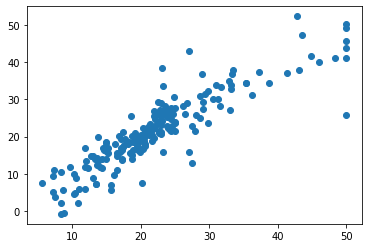

In [47]:
#Visualizing the predictive results: 
plt.scatter(y_test,y_pred_model2)

<AxesSubplot:ylabel='Count'>

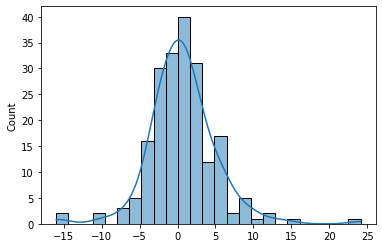

In [48]:
sns.histplot(y_test-y_pred_model2, kde=True)

### Ex2
##### Compara’ls en base al MSE i al R2.

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

##### model 1 = linear regression

In [50]:
print('Mean_Squared_Error : ' , mean_squared_error(y_test,y_pred_model1) )
print('Root_Mean_Squared_Error : ', r2_score(y_test,y_pred_model1))

Mean_Squared_Error :  25.79036215070244
Root_Mean_Squared_Error :  0.688260714253802


R2=.68 => 68% of the variance in houses prices is explained by our Linear regression model!! 

##### model 2 = Polynomial  regression

In [51]:
print('Mean_Squared_Error : ' , mean_squared_error(y_test,y_pred_model2) )
print('Root_Mean_Squared_Error : ', r2_score(y_test,y_pred_model2))

Mean_Squared_Error :  20.091802977504646
Root_Mean_Squared_Error :  0.7571416689319331


R2=.75 => 75% of the variance in houses prices is explained by our Polynomial regression model!! 
#### Seems Polynomial has better accuracy than linear one here!!!

### Ex3  
##### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [52]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
# linear model
model = LinearRegression().fit(X_train, y_train)
predi_train = model.predict(X_train)
predi_test = model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_test, y_test))

Mean_Absolute_Error Train :  3.118896450030043
Mean_Squared_Error Train:  19.922603269113182
Mean_Absolute_Error Test :  3.633127374024626
Mean_Squared_Error Test:  25.79036215070244


In [53]:
# linear model MODIFICATED
model_modif = LinearRegression(fit_intercept=False, copy_X=True, n_jobs=2, positive=True ).fit(X_train, y_train)
predi_train_modif = model_modif.predict(X_train)
predi_test_modif = model_modif.predict(X_test)

print('Mean_Absolute_Error Train : ' ,  mean_absolute_error(predi_train_modif, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train_modif, y_train))
print('Mean_Absolute_Error Test : ' , mean_absolute_error(predi_test_modif, y_test))
print('Mean_Squared_Error Test: ' , mean_squared_error(predi_test_modif, y_test))

Mean_Absolute_Error Train :  5.089549685129569
Mean_Squared_Error Train:  49.828649207064274
Mean_Absolute_Error Test :  5.074376676382752
Mean_Squared_Error Test:  51.44998488085785


#### So Params has a huge impact in the results; in this case, results and Accuracy has worsen a lot: wrong params here!!

### Ex4 
##### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [54]:
# our original linear model
model = LinearRegression().fit(X_train, y_train)
predi_train = model.predict(X_train)
predi_test = model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_test, y_test))

Mean_Absolute_Error Train :  3.118896450030043
Mean_Squared_Error Train:  19.922603269113182
Mean_Absolute_Error Test :  3.633127374024626
Mean_Squared_Error Test:  25.79036215070244


In [55]:
# aplicar cross-validation: GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid={'n_estimators': range(100, 500, 50),'max_features': range(2, 5, 1) }
gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='r2', cv=5)

grid_model = gsc.fit(X_train, y_train)
predi_grid_train = grid_model.predict(X_train)
predi_grid_test = grid_model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_grid_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_grid_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_grid_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_grid_test, y_test))

Mean_Absolute_Error Train :  0.8068668866886699
Mean_Squared_Error Train:  1.2518354719471954
Mean_Absolute_Error Test :  2.430259441707716
Mean_Squared_Error Test:  16.963931923371636


#### With cross-validation seems Accuracy is better! Perhaps is right... or not?

### Ex5 
##### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [56]:
X_noRM= df.drop('RM', axis = 1)
X_train_noRM, X_test_noRM, y_train_noRM, y_test_noRM = train_test_split(X_noRM, y, test_size=0.4, random_state=0)

In [57]:
model = LinearRegression().fit(X_train_noRM, y_train_noRM)
# coefficient of determinatios = .score
r_sq = model.score(X_train_noRM, y_train_noRM)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 1.0


### Model perfecte!!!!!!!!!

In [58]:
#predict new data -> b0+b1*x
y_pred_noRM = model.predict(X_test_noRM)
print(f"predicted response:\n{y_pred_noRM}")

predicted response:
[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8 26.7 21.7 22.  22.9 10.4 21.9 20.6 26.4 41.3 17.2
 27.1 20.4 16.5 24.4  8.4 23.   9.7 50.  30.5 12.3 19.4 21.2 20.3 18.8
 33.4 18.5 19.6 33.2 13.1  7.5 13.6 17.4  8.4 35.4 24.  13.4 26.2  7.2
 13.1 24.5 37.2 25.  24.1 16.6 32.9 36.2 11.   7.2 22.8 28.7 14.4 24.4
 18.1 22.5 20.5 15.2 17.4 13.6  8.7 18.2 35.4 31.7 33.  22.2 20.4 23.9
 25.  12.7 29.1 12.  17.7 27.  20.6 10.2 17.5 19.7 29.8 20.5 14.9 10.9
 19.5 22.7 19.5 24.6 25.  24.5 50.  14.3 11.8 31.  28.7 16

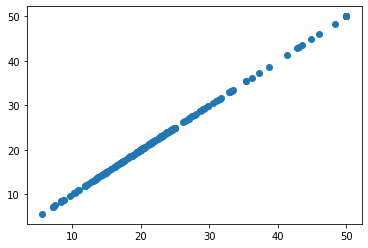

In [59]:
plt.scatter(y_test_noRM,y_pred_noRM)